! wget https://scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/ -O sweden.xls

https://www.scb.se/en/finding-statistics/statistics-by-subject-area/population/population-composition/population-statistics/pong/tables-and-graphs/yearly-statistics--the-whole-country/summary-of-population-statistics/

In [2]:
import pandas as pd

In [3]:
!pip install xlrd

In [4]:
full_df = pd.read_excel('sweden.xls','Tabell 1')


In [5]:
from datetime import datetime

df = full_df.iloc[6:]
columns = list(full_df.columns)
df = df[columns[:7]]
df = df.iloc[:-1]
df.columns = ['date','y2015','y2016','y2017','y2018','y2019','y2020']
swedish_months = ['januari','februari','mars','april','maj','juni','juli','augusti','september','oktober','november','december']
df['datestamp'] = df.date.str.split(' ').apply(lambda z: "{0:02d}-{1:02d}".format(int(z[0]), swedish_months.index(z[1])+1))
df = df.set_index('datestamp')
df = df.drop('date', axis=1)


In [6]:
from yo_ds import Query
pop = pd.read_csv('sweden_population.csv')
pop = pop.transpose().iloc[1:].reset_index()
pop.columns=['year','population']
pop.year = pop.year.astype(int)+1
pop.population = pop.population.apply(lambda z: int(z.replace(' ','')))
pop = Query.df(pop).to_dictionary(lambda z: str(z.year), lambda z: z.population)

In [7]:
years = [str(c) for c in range(2015,2021)]
years

['2015', '2016', '2017', '2018', '2019', '2020']

In [8]:
cumulative = []
relatives = []
for y in years:
    rl_name = 'rel_'+y
    df[rl_name] = df['y'+y]/pop[y]
    relatives.append(rl_name)
    
    cm_name = 'cm_'+y
    cumulative.append(cm_name)
    df[cm_name] = df[rl_name].cumsum()
    
df

,y2015,y2016,y2017,y2018,y2019,y2020,rel_2015,cm_2015,rel_2016,cm_2016,rel_2017,cm_2017,rel_2018,cm_2018,rel_2019,cm_2019,rel_2020,cm_2020
datestamp,,,,,,,,,,,,,,,,,,
01-01,295,245.0,339.0,275.0,300.0,254.0,3.02646e-05,3.02646e-05,0.000025,0.000025,0.000034,0.000034,0.000027,0.000027,0.000029,0.000029,0.000025,0.000025
02-01,272,272.0,317.0,312.0,276.0,300.0,2.7905e-05,5.81696e-05,0.000028,0.000052,0.000032,0.000066,0.000031,0.000058,0.000027,0.000056,0.000029,0.000054
03-01,281,293.0,310.0,295.0,271.0,256.0,2.88283e-05,8.6998e-05,0.000030,0.000082,0.000031,0.000097,0.000029,0.000087,0.000026,0.000083,0.000025,0.000078
04-01,256,260.0,305.0,285.0,282.0,273.0,2.62635e-05,0.000113261,0.000026,0.000109,0.000031,0.000127,0.000028,0.000115,0.000028,0.000110,0.000026,0.000105
05-01,268,260.0,304.0,291.0,275.0,265.0,2.74946e-05,0.000140756,0.000026,0.000135,0.000030,0.000158,0.000029,0.000144,0.000027,0.000137,0.000026,0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27-12,227,249.0,271.0,240.0,238.0,0.0,2.32884e-05,0.00911458,0.000025,0.008922,0.000027,0.008866,0.000024,0.008760,0.000023,0.008330,0.000000,0.006756
28-12,274,262.0,273.0,261.0,215.0,0.0,2.81102e-05,0.00914269,0.000027,0.008948,0.000027,0.008893,0.000026,0.008786,0.000021,0.008351,0.000000,0.006756
29-12,292,274.0,276.0,263.0,244.0,0.0,2.99568e-05,0.00917264,0.000028,0.008976,0.000028,0.008921,0.000026,0.008812,0.000024,0.008375,0.000000,0.006756


<AxesSubplot:>

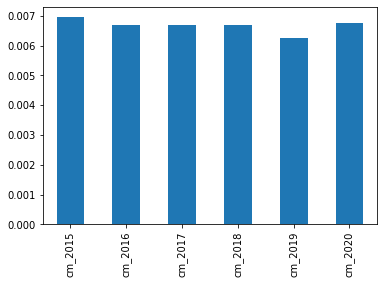

In [9]:
df.loc['30-09'][cumulative].plot(kind='bar')

/home/yura/anaconda3/envs/bsys/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='datestamp'>

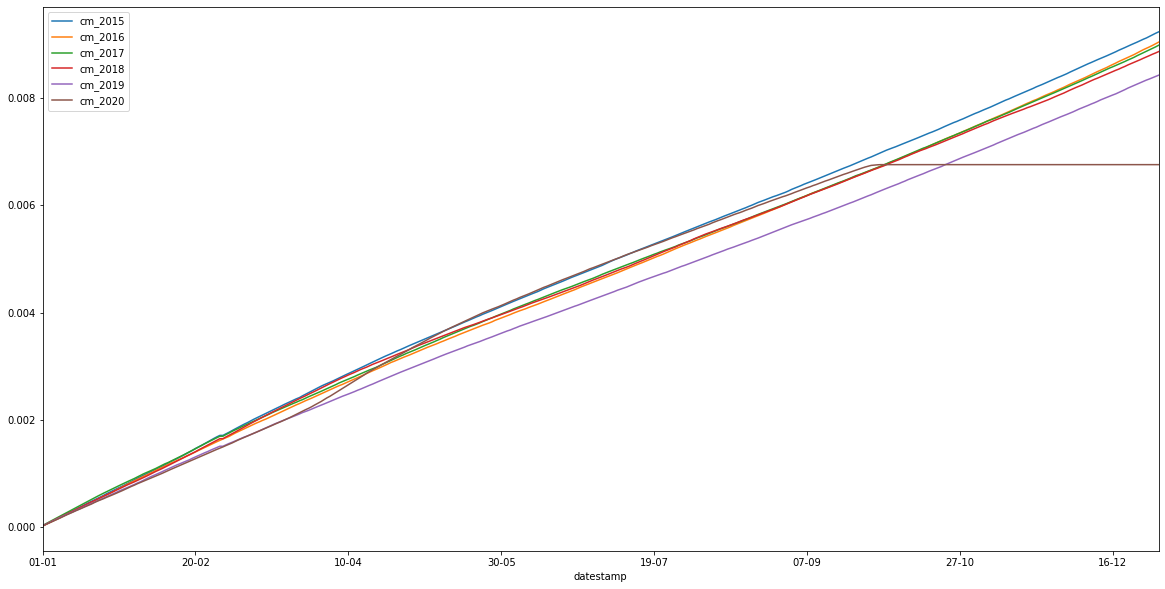

In [16]:
from matplotlib import pyplot as plt
_, ax = plt.subplots(1,1,figsize=(20,10))
df[cumulative].plot(ax=ax)

In [12]:
date='30-09'
df.loc[date][cumulative]

cm_2015    0.00695153
cm_2016    0.00669829
cm_2017    0.00670015
cm_2018    0.00668798
cm_2019    0.00624368
cm_2020     0.0067525
Name: 30-09, dtype: object

In [13]:

old = df.loc[date][cumulative].iloc[:-1]
mu, sigma = old.mean(), old.std()
(df.loc[date][cumulative].iloc[-1]-mu)/sigma

0.37569152549150425